# 1 Classification with Abstain Option

a) If loss for absteining is bigger, then it's always more optimal to predict any class. Because even predicting wrong class will result in smaller error, then abstaining from prediction. 

b) Abstaining is optimal when $a \leq c \cdot [1 - \max_{y \in Y} p(x|y)]$, so

$\max_{y \in Y} p(x|y) \leq 1 - \frac{a}{c}$,

thus it's optimal to abstain if $\max_{y \in Y} p(y|x) < 1 - \frac{a}{c}$ and predict $\arg\max_{y \in Y} p(y|x)$ otherwise.

# 2 Coin Flips

a) For $D = \{x_1, x_2, ..., x_n\}$,

$p(D|q) = \prod_{i=1}^n p(X_i) = \prod_{i=1}^n q^{X_i}(1 - q)^{1 - X_i}$, log form of which is

$\log p(D|q) = \sum_{i=1}^n X_i \log q + (1 - X_i) \log (1 - q)$, which we need to maximize.

Setting the derivative w.r.t to q equal 0:

$\hat{q}_{\text{MLE}} = \frac{1}{n} \sum_{i=1}^n X_i$

For small $n$ we will have too much fluctuations. For example, if $n = 1$, then estimate for q is ether 0 or 1, which may be very far from the true probability.

b) No, there is no such number. By the law of large number increasing $n$ will lead to better convergence, but we can concider absolutely "safe" only infinite number of samples. In practice $n \geq 30$ is usable

c) Yes (from wiki)

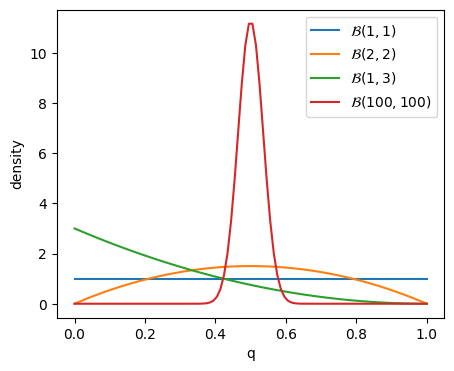

In [35]:
# d)
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

x = np.linspace(0, 1, 100)
params = [(1, 1), (2, 2), (1, 3), (100, 100)]
titles = [r'$\mathcal{B}(1,1)$', r'$\mathcal{B}(2,2)$', r'$\mathcal{B}(1,3)$', r'$\mathcal{B}(100,100)$']

plt.figure(figsize=(5, 4))
for i, (alpha, beta_param) in enumerate(params):
    plt.plot(x, beta.pdf(x, alpha, beta_param), label=titles[i])

plt.legend()
plt.xlabel("q")
plt.ylabel("density")
plt.show()

# 3 Model Evaluation in the Literature

## 1. Bootstrapped Training of Score-Conditioned
Main tables are 4.1, 4.2 and figure 4.1

a) Hyperparametres are stated in section A.3 with no justification. In section B authors propose to use "Calibration function" to chose number of training steps, early stopping points and it seems like other hyperparametres also. It's unclear for me, but based on too round values, I think that authours have just chosen the hyperparametres they liked.

b) All results are reported with `standart deviation` (althoug sometimes it's `± 0.000`). Authors report results for 50th and 100th percentile and mean. They use metrics of divercity and novelty of generated sequences.

c) Yes, but not fully. Firstly, I didn't really understand how all hyperparametres were tuned. Secondly, I am not sure that std of 0 is achivable.


## 2. HyenaDNA: Long-Range Genomic Sequence Modeling at Single Nucleotide Resolution
a) Hyperparameters and their ranges stated, validaion set (same split as in another article).

b) No statstics at all.

c) Authors used 14 and X chromosomes exclusivelly for test set, which is not very obsious choice considering unique differences in all chromosomes, especially X. In general, the article lacks clear explanations for both a) and b).

## 3. PoET: A generative model of protein families as sequences-of-sequences
a) Validation set (same split as in another article).

b) `Spearman correlation` between predicted and actual fitness scores and `t-test` to compare models.

c) It's much better then previous articles in terms of statistical justification and transparancy of used methods. Reporting varience (or confidential intervals) would benefit the article.

# 4 Practical: Tails Matter

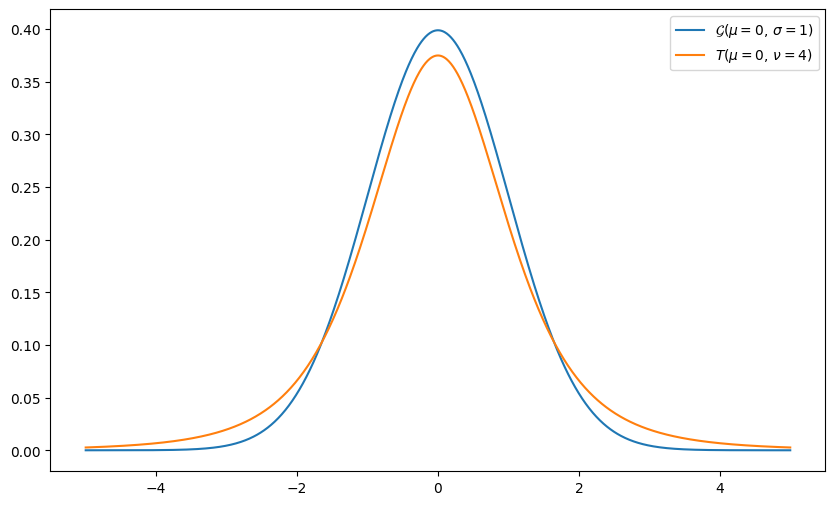

In [26]:
import matplotlib.pyplot as plt
from scipy.stats import norm 
from scipy.stats import t
import numpy as np

x = np.linspace(-5, 5, 1000) 

plt.figure(figsize=(10, 6))
plt.plot(x, norm.pdf(x, 0, 1), label=r'$\mathcal{G}(\mu=0,\,\sigma=1)$')
plt.plot(x, t.pdf(x, 4, 0), label=r'$T(\mu=0,\,\nu=4)$')
plt.legend()
plt.show() 

Tales for $T(\mu=0,\,\nu=4)$ are heavier then for $\mathcal{G}(\mu=0,\,\sigma=1)$

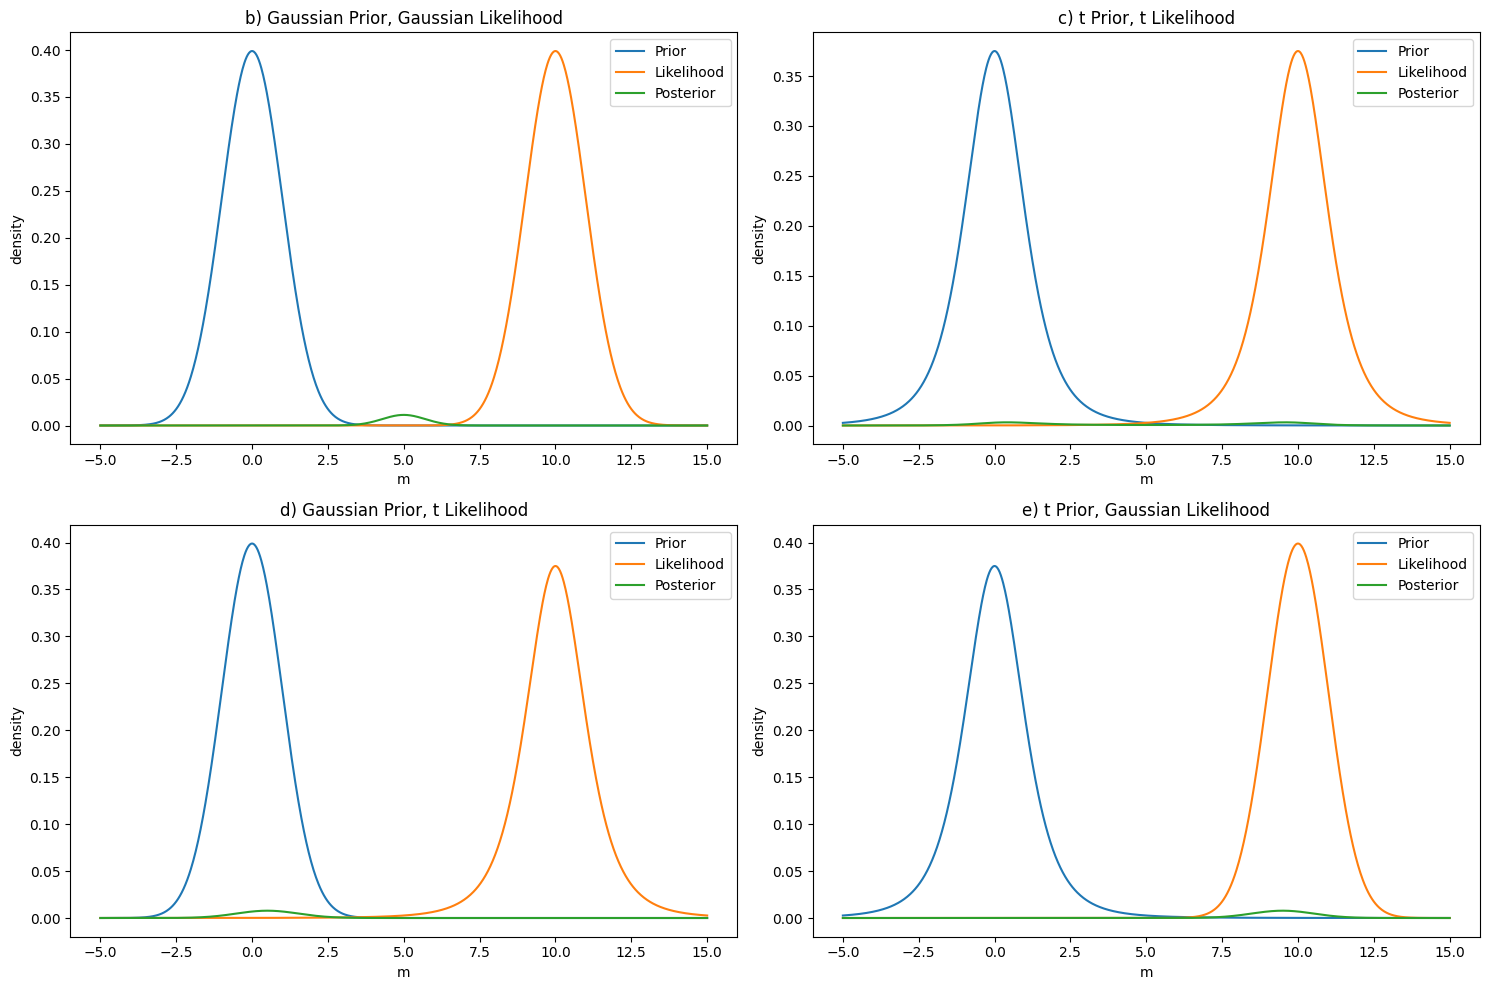

In [43]:
x_obs = 10
x = np.linspace(-5, 15, 1000)

# b) Gaussian Prior, Gaussian Likelihood
prior_b = norm.pdf(x, loc=0, scale=1)
likelihood_b = norm.pdf(x_obs, loc=x, scale=1)
posterior_b = prior_b * likelihood_b
posterior_b /= posterior_b.sum()

# c) t Prior, t Likelihood
prior_c = t.pdf(x, df=4, loc=0)
likelihood_c = t.pdf(x_obs, df=4, loc=x)
posterior_c = prior_c * likelihood_c
posterior_c /= posterior_c.sum()

# d) Gaussian Prior, t Likelihood
prior_d = norm.pdf(x, loc=0, scale=1)
likelihood_d = t.pdf(x_obs, df=4, loc=x)
posterior_d = prior_d * likelihood_d
posterior_d /= posterior_d.sum()

# e) t Prior, Gaussian Likelihood
prior_e = t.pdf(x, df=4, loc=0)
likelihood_e = norm.pdf(x_obs, loc=x, scale=1)
posterior_e = prior_e * likelihood_e
posterior_e /= posterior_e.sum()

# Plotting b-e
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
distributions = [(prior_b, likelihood_b, posterior_b, 'b) Gaussian Prior, Gaussian Likelihood'),
                 (prior_c, likelihood_c, posterior_c, 'c) t Prior, t Likelihood'),
                 (prior_d, likelihood_d, posterior_d, 'd) Gaussian Prior, t Likelihood'),
                 (prior_e, likelihood_e, posterior_e, 'e) t Prior, Gaussian Likelihood')]

for ax, (prior, likelihood, posterior, title) in zip(axs.flatten(), distributions):
    ax.plot(x, prior, label='Prior')
    ax.plot(x, likelihood, label='Likelihood')
    ax.plot(x, posterior, label='Posterior')
    ax.set_title(title)
    ax.set_xlabel("m")
    ax.set_ylabel("density")
    ax.legend()

plt.tight_layout()
plt.show()

f) Both gaussian result in gaussian posterior with  $\mu = 5$. t-dist is more robust to outliers and is concentrated around mean more, selecting it as prior shifts mean to $\mu = 10$, and selecting as likelihood shifts mean to $\mu = 0$. If t-dist is chosen for both prior and likelyhood, then model gives two maximums in posterior (0 and 10).